### Q2

"What kind of military aid has been provided to Ukraine?" 

Data source: https://www.ifw-kiel.de/publications/ukraine-support-tracker-data-20758

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load only the sheet you want
sheet_name = "Bilateral Assistance, MAIN DATA"  # Change this to your actual sheet name
xlsx_path = "Ukraine_Support_Tracker_Release_21.xlsx"  # Replace with your file path
csv_path = "BilateralAssistance.csv"       # Desired output name

# Read the specific sheet
df = pd.read_excel(xlsx_path, sheet_name=sheet_name, engine='openpyxl')

# Export to CSV
df.to_csv(csv_path, index=False)

In [8]:

# Load only the sheet you want
sheet_name = "Table1"  # Change this to your actual sheet name
xlsx_path = "Ukraine_Support_Tracker_Release_21.xlsx"  # Replace with your file path
csv_path = "BilateralAssistance.csv"       # Desired output name

# Read the specific sheet
df = pd.read_excel(xlsx_path, sheet_name=sheet_name, engine='openpyxl')

# Export to CSV
df.to_csv(csv_path, index=False)

In [9]:
# Extract all the rows having Geographic Europe = 1

df = df[df['Geographic Europe'] == 1]
# Drop the EU (Commission and Council) row 

df = df[df['Country'] != 'EU (Commission and Council)']

/tmp/ipykernel_987/2816759130.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Country'] = pd.Categorical(filtered_df['Country'], categories=top_countries, ordered=True)
/tmp/ipykernel_987/2816759130.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_aid = filtered_df.groupby('Country')['allocation_value'].sum().reindex(top_countries)


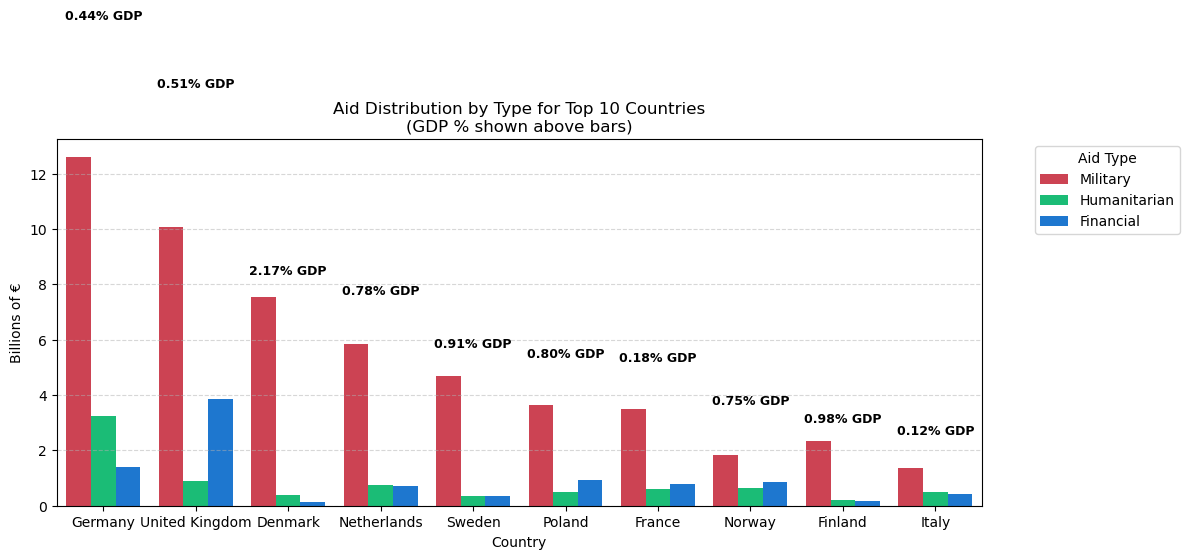

In [22]:

# Melt and clean again
alloc_df = pd.DataFrame(df)
long_df = alloc_df.melt(id_vars=['Country', 'Total bilateral allocations4'], 
                        value_vars=['Military allocations', 'Humanitarian allocations','Financial allocations'],
                        var_name='aid_type_general', 
                        value_name='allocation_value')
long_df['aid_type_general'] = long_df['aid_type_general'].str.replace(' allocations', '')

# Compute total aid per country and get top 10
total_by_country = long_df.groupby('Country')['allocation_value'].sum().sort_values(ascending=False)
top_countries = total_by_country.head(10).index
filtered_df = long_df[long_df['Country'].isin(top_countries)]

# Set country order
filtered_df['Country'] = pd.Categorical(filtered_df['Country'], categories=top_countries, ordered=True)

# Use "Total bilateral allocations4" as GDP % column
gdp_percent_map = df.set_index('Country')['Total bilateral allocations4'].to_dict()
total_aid = filtered_df.groupby('Country')['allocation_value'].sum().reindex(top_countries)

# Plot with GDP % annotations
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=filtered_df, x='Country', y='allocation_value', hue='aid_type_general', 
                 palette=custom_colors)

for i, country in enumerate(top_countries):
    gdp_value = gdp_percent_map.get(country, np.nan)
    if not np.isnan(gdp_value):
        total_height = total_aid[country]
        ax.text(i, total_height + 0.2, f"{gdp_value:.2f}% GDP", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.ylabel('Billions of €')
plt.xlabel('Country')
plt.title('Aid Distribution by Type for Top 10 Countries\n(GDP % shown above bars)')
plt.legend(title='Aid Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/tmp/ipykernel_987/2539304816.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_df = pivot_df.fillna(0)


aid_type_general,Financial,Humanitarian,Military,Total
Country,,,,
Germany,1.407000,3.243120,12.611969,17.262089
United Kingdom,3.840894,0.897047,10.067975,14.805916
Denmark,0.122336,0.382027,7.543236,8.047599
Netherlands,0.715875,0.760804,5.853568,7.330248
Sweden,0.348204,0.368019,4.689069,5.405292
Poland,0.912999,0.484941,3.636197,5.034137
France,0.799400,0.595223,3.497235,4.891858
Norway,0.871192,0.643469,1.832533,3.347195
Finland,0.154800,0.221243,2.334800,2.710843
